# 1️⃣ Exploratory Data Analysis (EDA)

### 1.1 Load & Clean the Dataset

In [229]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [230]:
import pandas as pd

# Load necessary CSV files
orders = pd.read_csv(r'G:\Gayathri\Blinkit\blinkit_orders.csv')
delivery = pd.read_csv(r'G:\Gayathri\Blinkit\blinkit_delivery_performance.csv')
customers = pd.read_csv(r'G:\Gayathri\Blinkit\blinkit_customers.csv')
feedback = pd.read_csv(r'G:\Gayathri\Blinkit\blinkit_customer_feedback.csv')

# Handle missing data
orders.fillna(0, inplace=True)
delivery.fillna(0, inplace=True)
customers.fillna('Unknown', inplace=True)
feedback.fillna('', inplace=True)

# Merge orders & delivery for delivery analysis
order_delivery = pd.merge(orders, delivery, on='order_id', how='inner')


In [231]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


### 1.2 Descriptive Statistics

In [232]:
print("Order Totals Summary:\n", orders['order_total'].describe())
print("Delivery Time Summary:\n", delivery['delivery_time_minutes'].describe())
print("Customer Segments:\n", customers['customer_segment'].value_counts())


Order Totals Summary:
 count    5000.00000
mean     2201.86170
std      1303.02438
min        13.25000
25%      1086.21500
50%      2100.69000
75%      3156.88250
max      6721.46000
Name: order_total, dtype: float64
Delivery Time Summary:
 count    5000.000000
mean        4.443000
std         8.063929
min        -5.000000
25%        -1.000000
50%         2.000000
75%         8.000000
max        30.000000
Name: delivery_time_minutes, dtype: float64
Customer Segments:
 customer_segment
Regular     639
Premium     633
New         628
Inactive    600
Name: count, dtype: int64


### 1.3 Visualization

In [233]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


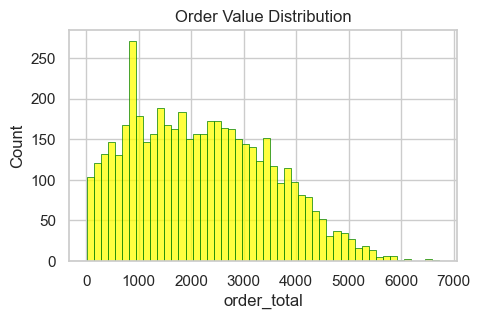

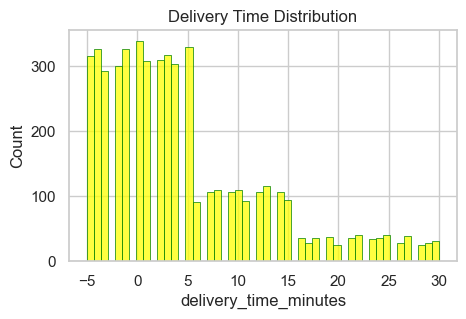

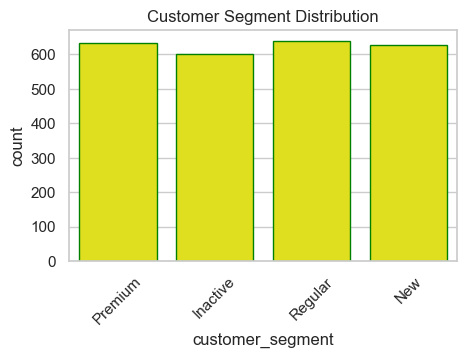

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Order Value Distribution
plt.figure(figsize=(5,3))
sns.histplot(orders['order_total'], bins=50,color='yellow', edgecolor='green')
plt.title("Order Value Distribution")
plt.show()

# Delivery Time Distribution
plt.figure(figsize=(5,3))
sns.histplot(delivery['delivery_time_minutes'], bins=50,color='yellow', edgecolor='green')
plt.title("Delivery Time Distribution")
plt.show()

# Customer Segments
plt.figure(figsize=(5,3))
sns.countplot(x='customer_segment', data=customers,color='yellow', edgecolor='green')
plt.xticks(rotation=45)
plt.title("Customer Segment Distribution")
plt.show()


# 2️⃣ Sentiment Analysis & Text Processing

### 2.1 Frequent Words

In [235]:
from collections import Counter
import re

# Basic cleaning
feedback['feedback_text'] = feedback['feedback_text'].fillna('').astype(str).str.lower()
all_words = ' '.join(feedback['feedback_text']).split()

# Filter stop words (optional)
filtered_words = [word for word in all_words if word.isalpha()]
common_words = Counter(filtered_words).most_common(20)
print("Top words: ", common_words)


Top words:  [('was', 1961), ('the', 1503), ('nothing', 1065), ('product', 874), ('but', 676), ('could', 653), ('very', 625), ('my', 544), ('i', 526), ('delivery', 492), ('and', 490), ('not', 479), ('met', 386), ('to', 366), ('complain', 366), ('order', 344), ('average', 343), ('will', 343), ('it', 333), ('good', 333)]


### 2.2 Correlate Sentiment with Order Value

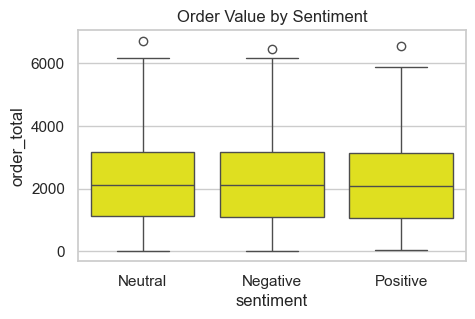

In [259]:
# Merge feedback & orders
feedback_orders = pd.merge(feedback, orders, on='order_id', how='inner')
plt.figure(figsize=(5,3))
sns.boxplot(x='sentiment', y='order_total', data=feedback_orders,color='yellow')
plt.title("Order Value by Sentiment")
plt.show()


### 2.3 Correlate Sentiment with Delivery Delays

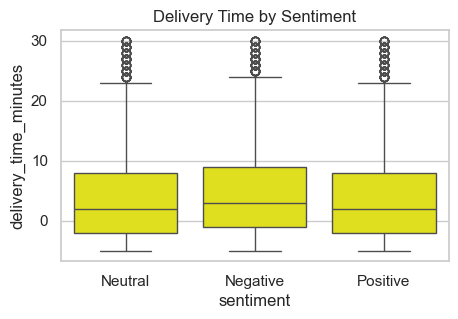

In [260]:
feedback_delivery = pd.merge(feedback_orders, delivery, on='order_id', how='inner')
plt.figure(figsize=(5,3))
sns.boxplot(x='sentiment', y='delivery_time_minutes', data=feedback_delivery,color='yellow')
plt.title("Delivery Time by Sentiment")
plt.show()


In [243]:
delivery.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,0
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,0
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


# 3️⃣ Delivery Time Prediction (Regression Model)

### 3.1 Build Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
delivery = pd.read_csv(r'G:\Gayathri\Blinkit\blinkit_delivery_performance.csv')

# Convert promised_time and actual_time to datetime
delivery['promised_time'] = pd.to_datetime(delivery['promised_time'])
delivery['actual_time'] = pd.to_datetime(delivery['actual_time'])

# Feature engineering: extract time components
delivery['promised_hour'] = delivery['promised_time'].dt.hour
delivery['promised_dayofweek'] = delivery['promised_time'].dt.dayofweek
delivery['promised_month'] = delivery['promised_time'].dt.month

# Features & Target
X = delivery[['distance_km', 'promised_hour', 'promised_dayofweek', 'promised_month', 'delivery_partner_id']]
y = delivery['delivery_time_minutes']

# Handle categorical delivery_partner_id
X = pd.get_dummies(X, columns=['delivery_partner_id'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 61.73927980364589
R² Score: -0.00022526884034146377


# 4️⃣ Customer Segmentation (KMeans Clustering)

### 4.1 Prepare Clustering Data

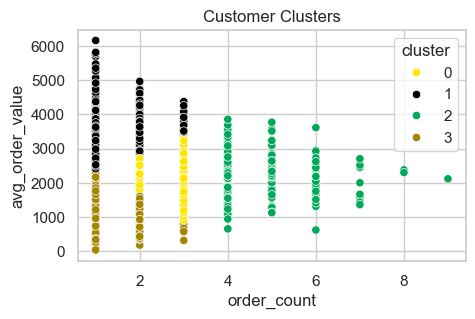

In [261]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate customer purchase data
order_summary = orders.groupby('customer_id').agg({'order_id':'count', 'order_total':'mean'}).reset_index()
order_summary.columns = ['customer_id', 'order_count', 'avg_order_value']

# Merge customer segment
cluster_data = pd.merge(order_summary, customers[['customer_id','customer_segment']], on='customer_id', how='inner')

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data[['order_count', 'avg_order_value']])

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(5,3))
sns.scatterplot(data=cluster_data, x='order_count', y='avg_order_value', hue='cluster',palette=['#FFE600', '#000000', '#00A859','#A38600'])
plt.title("Customer Clusters")
plt.show()


# 5️⃣ Sales Forecasting (Time Series)

### 5.1 Prepare Time Series

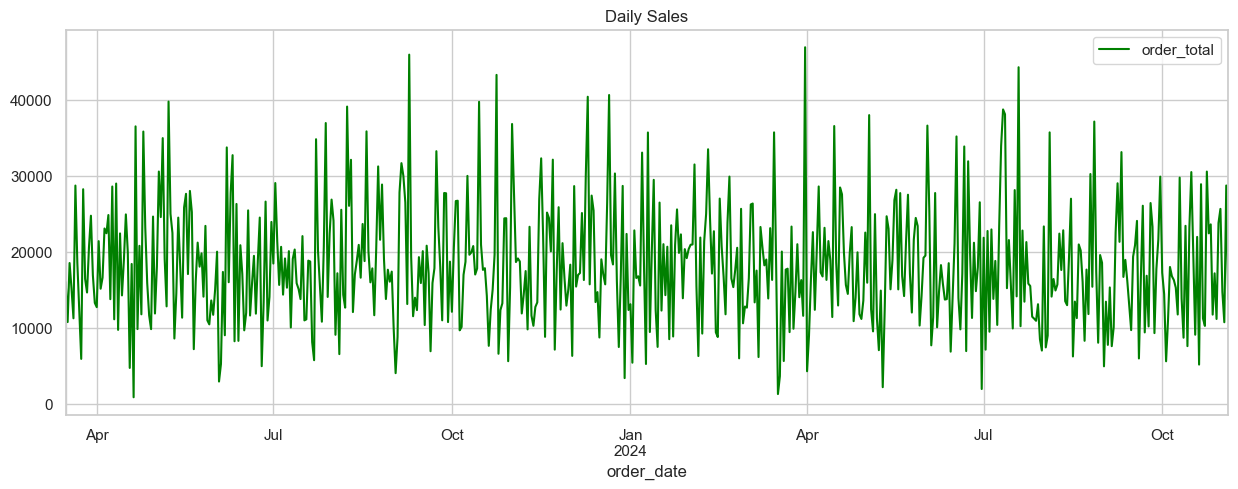

In [265]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
sales_ts = orders.groupby(pd.Grouper(key='order_date', freq='D')).agg({'order_total':'sum'})

sales_ts.plot(figsize=(15,5),color='green')
plt.title("Daily Sales")
plt.show()


### 5.2 Forecast Next Quarter

In [267]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.6 MB 2.2 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.6 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.6 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.3 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.6 MB 2.4 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.6 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.6 MB 2.5 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.6 MB 2.7 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 2.7 MB/s eta 0:00:02
   ---------------------------- ----


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


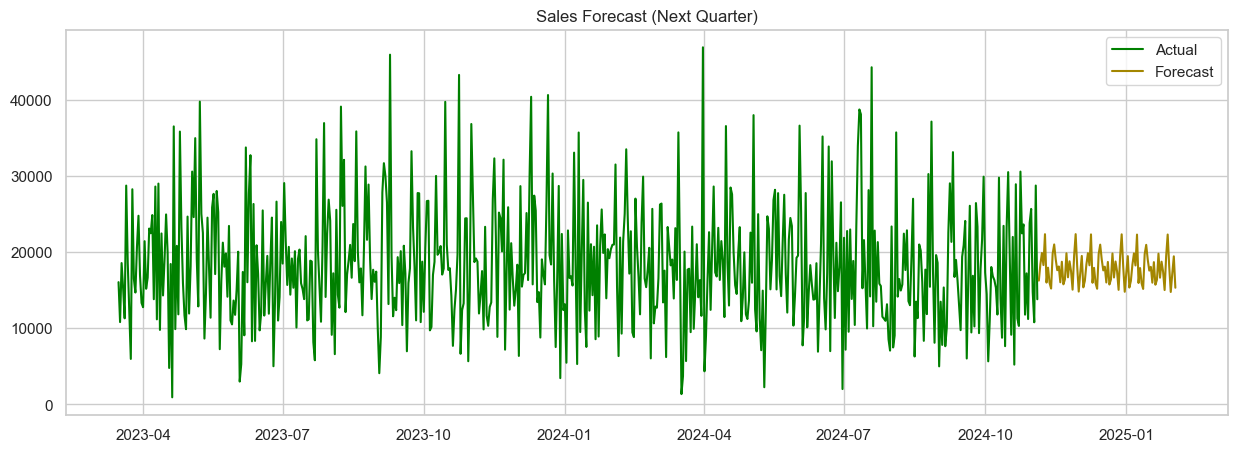

In [269]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(sales_ts, trend="add", seasonal="add", seasonal_periods=30)
model_fit = model.fit()

forecast = model_fit.forecast(90)

plt.figure(figsize=(15,5))
plt.plot(sales_ts, label='Actual',color='green')
plt.plot(forecast, label='Forecast',color='#A38600')
plt.title("Sales Forecast (Next Quarter)")
plt.legend()
plt.show()
